In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import zscore
import math

In [2]:
df=pd.read_csv("baseball dataset.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

<AxesSubplot:>

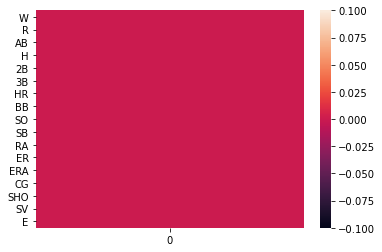

In [5]:
sns.heatmap(df.isnull().sum().to_frame())

In [6]:
df.info() #no need to convert data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

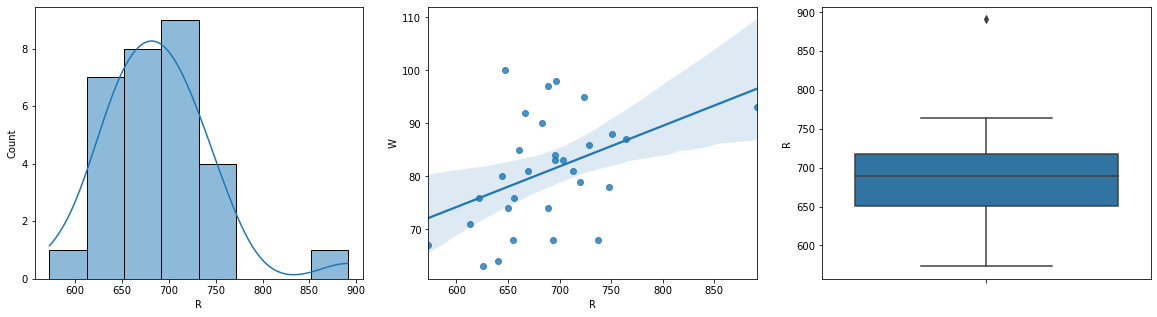

In [8]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x="R",data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x="R",y="W",data=df)
plt.subplot(1,3,3)
sns.boxplot(y="R",data=df)
plt.show()

    

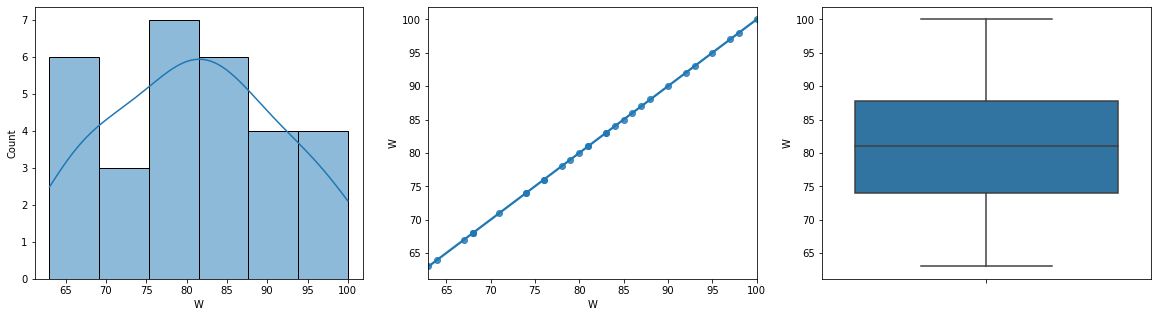

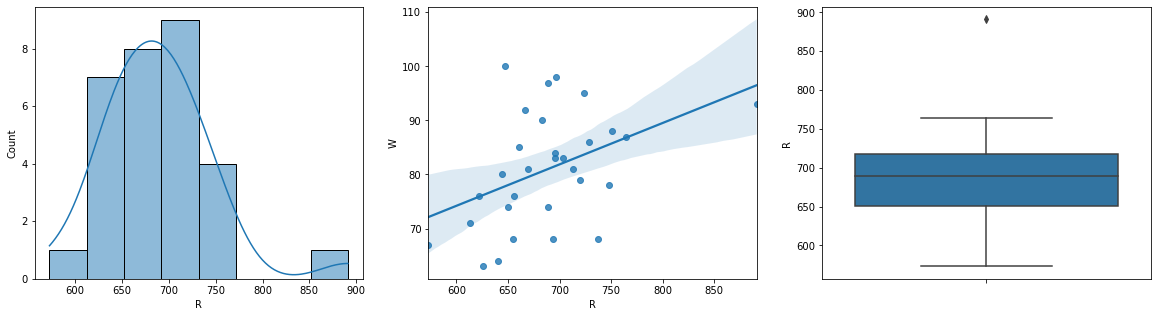

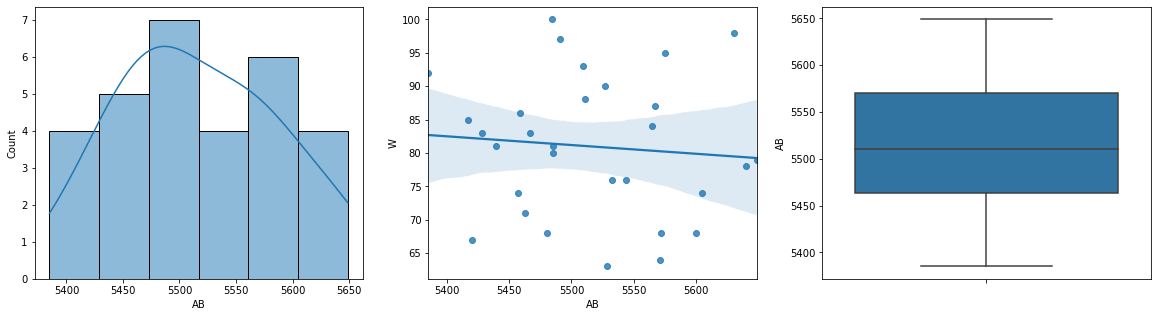

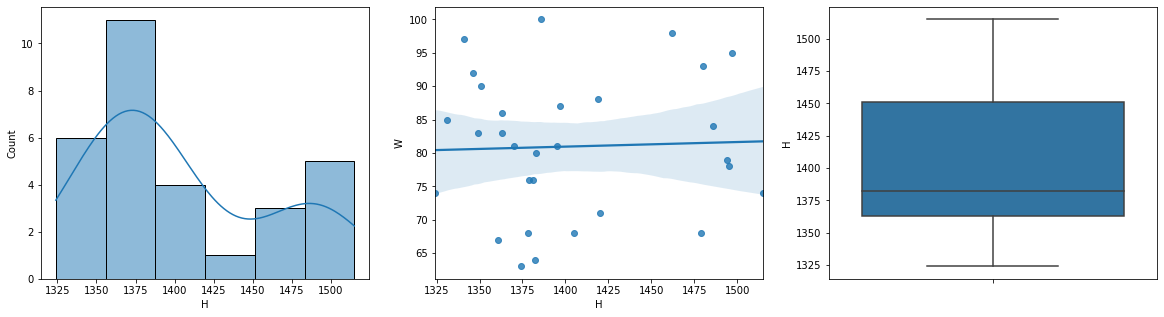

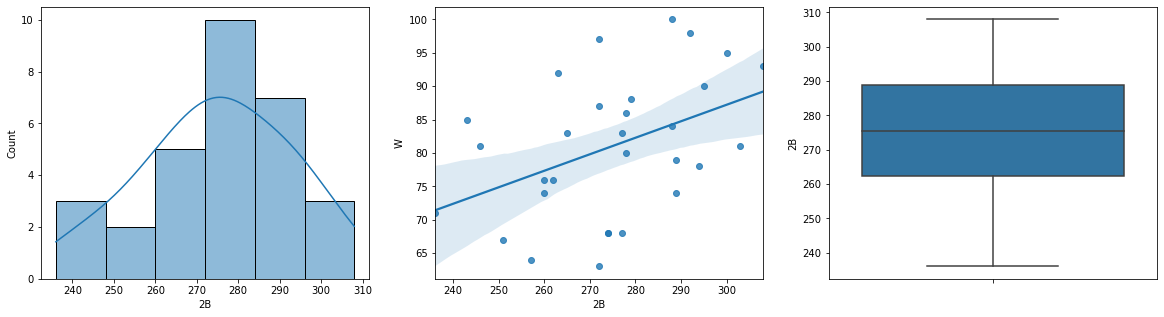

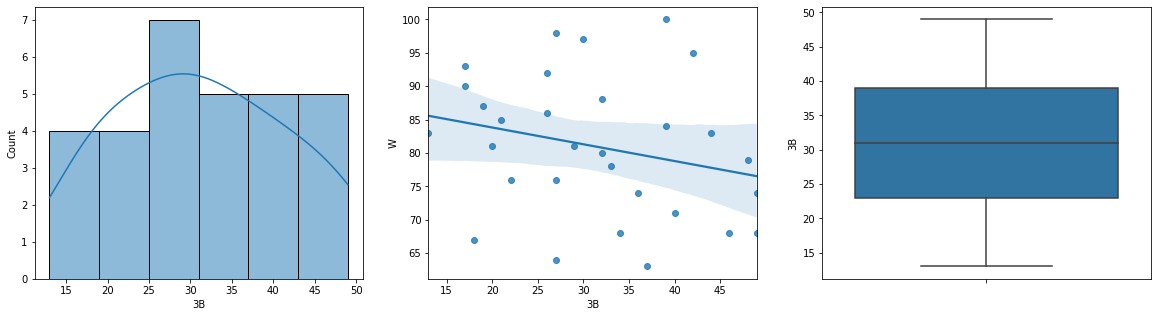

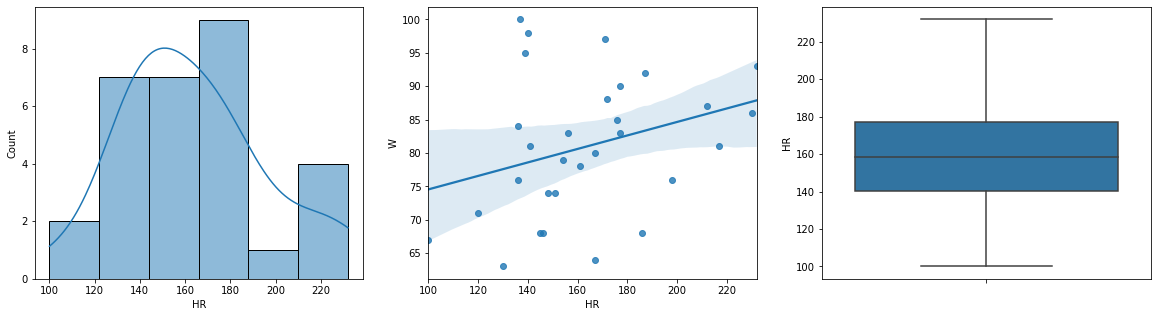

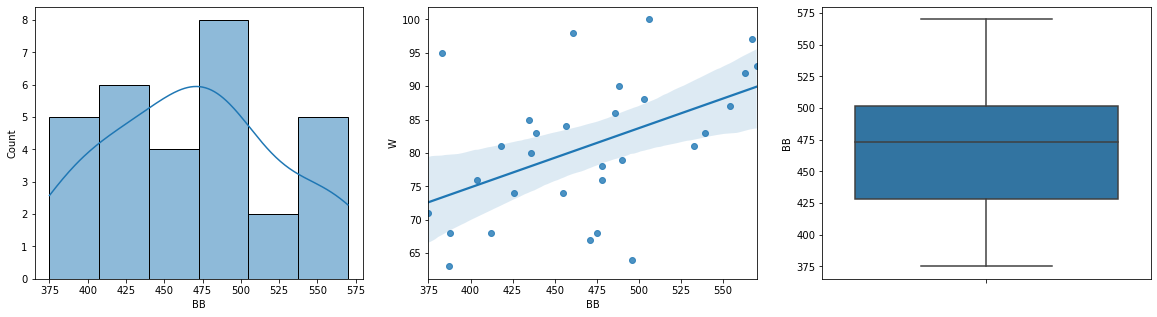

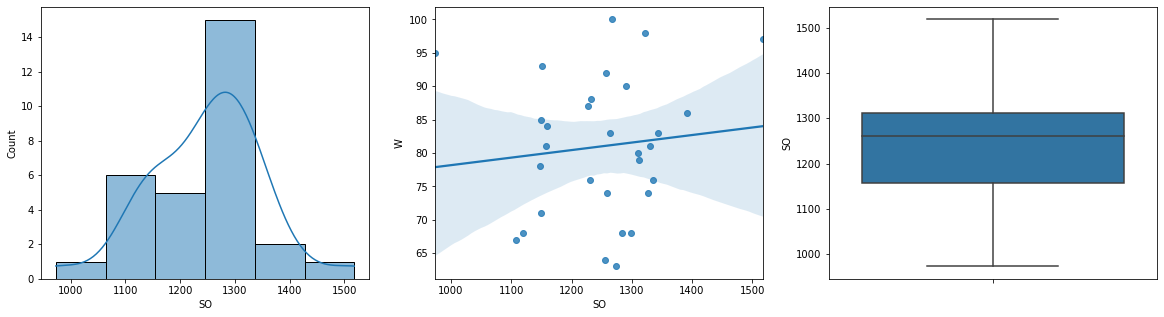

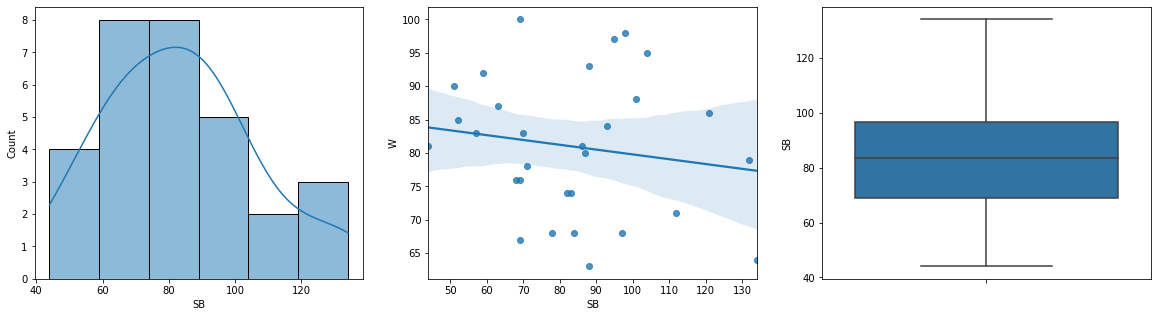

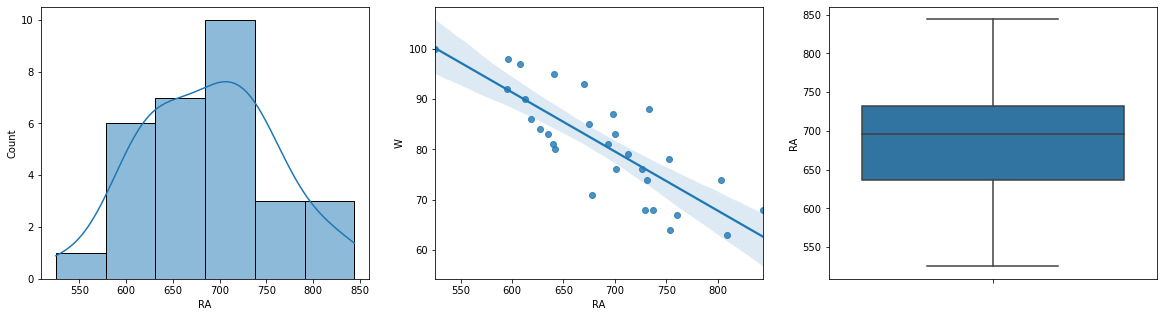

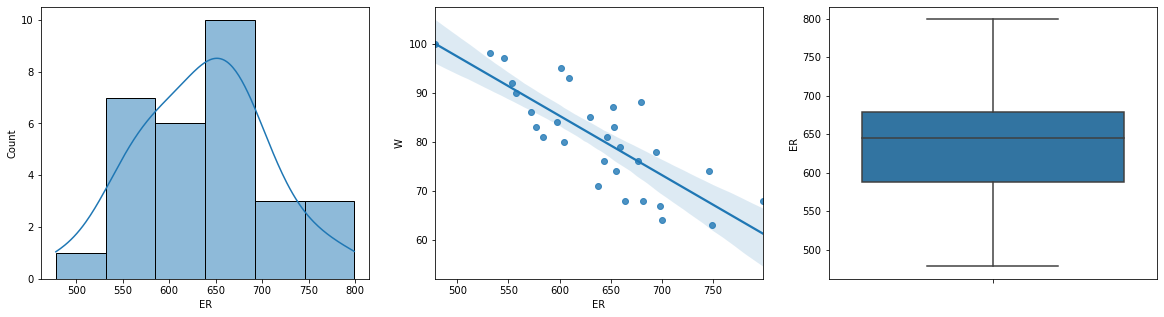

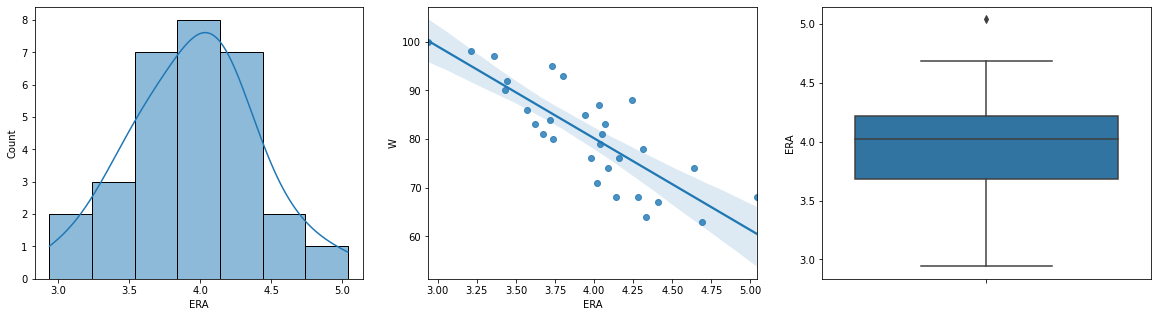

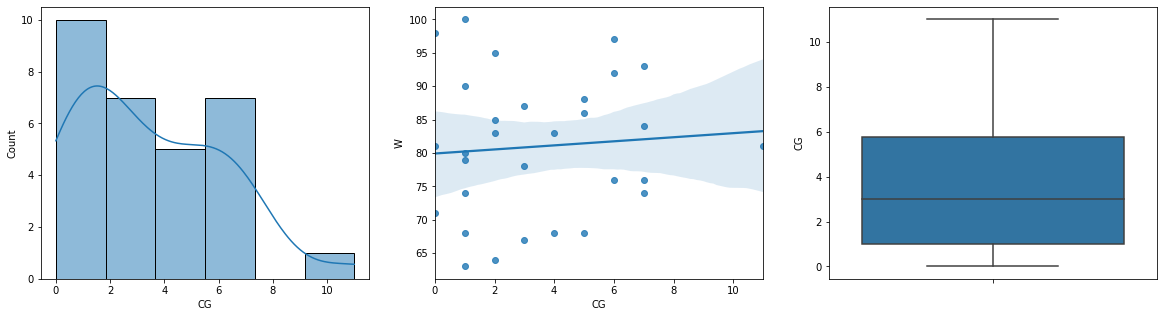

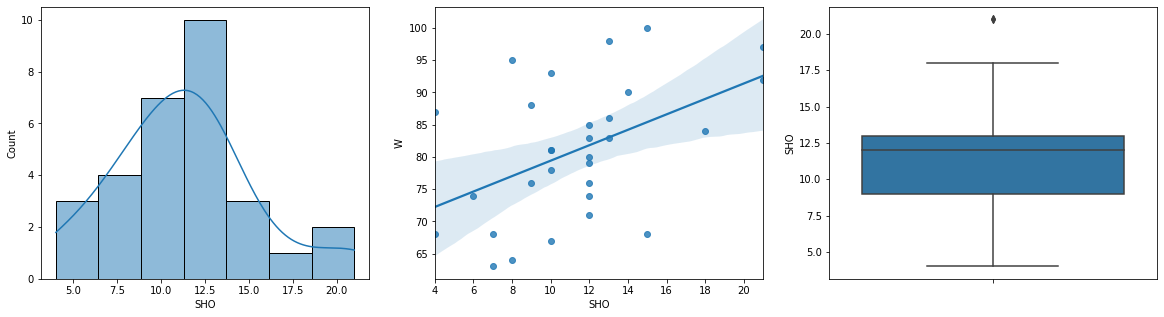

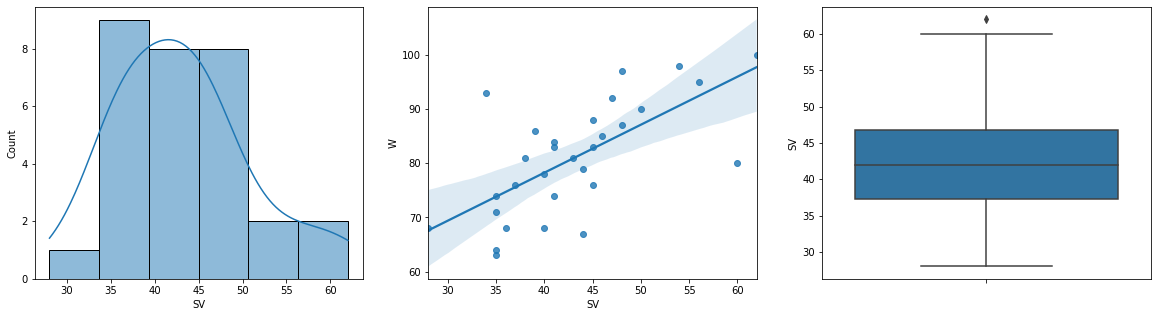

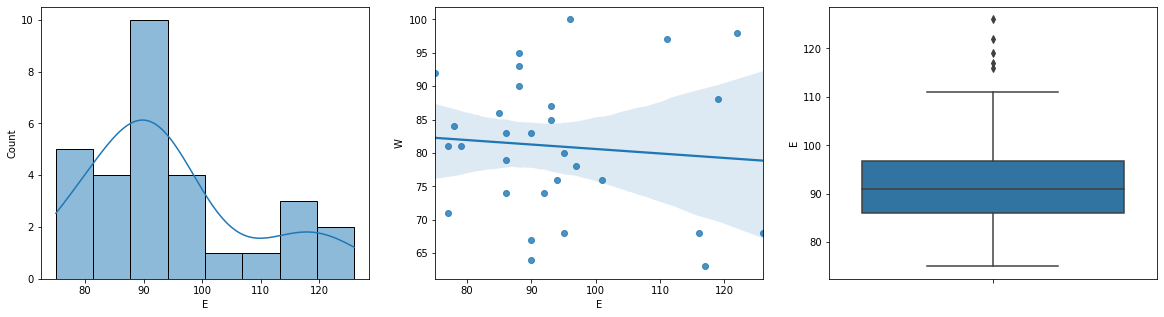

In [9]:
for i in df :
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y="W",data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
s = SelectKBest(f_classif, k=15)
s.fit(x,y)
anova=pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

NameError: name 'x' is not defined

In [ ]:
num=[]
cat=[]
count=df.nunique()
for i in df.columns:
    if count[i]>5:
        num.append(i)
    else:
        cat.append(i)
pt=pd.DataFrame()
for i in num:
    if df[i].min()<=0:
        pt1=(df[i]-df[i].min()+0.0001)
    else:
        pt1=df[i]
        pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)
        pt1=PT(pt)
        pt1=pd.DataFrame(pt1,columns=num)

sns.heatmap(pt1.corr(),annot=True,cmap="PiYG")

In [ ]:
def num_cat(df):
    num=[]
    cat=[]
    count=df.nunique()
for i in df.columns:
    if count[i]>5:
        num.append(i)
    else:
        cat.append(i)
        return(num,cat)
from sklearn.preprocessing import power_transform as PT
def pow_tran(df,num):
pt=pd.DataFrame()
for i in num:
if df[i].min()<=0:
pt1=(df[i]-df[i].min()+0.0001)
else:
pt1=df[i]
pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)
pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=num)
return(pt1)
def num_plot(df,num):
for i in num:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=i,data=df,kde=True,hue=’Churn’)
plt.subplot(1,3,2)
sns.regplot(x=i,y=’W’data=df,kde=True,hue=’Churn’)
plt.subplot(1,3,3)
sns.boxplot(y=i,data=df)
plt.show()
def z_outlier(df,num):
df_z=df[num]
z=np.abs(stat.zscore(df_z))
a=int(df_z.size)
df_z = df_z[(z>3).all(axis=1)]
print(‘Percent of data retained = ‘+ str(int(df_z.size)/a))
return(df_z)
def stan_sc(df,num):
ss=StandardScaler()
x=df[num].to_numpy()
x1=pd.DataFrame(ss.fit_transform(x),columns=num)
return(x1)

In [ ]:
from sklearn.linear_model import LinearRegression
def clf(model,x,y,x_test,y_test):
    lr = model.fit(x, y)
    y_pred=lr.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    lr_acc=f1_score(y_test,y_pred)
    cv_results = cross_validate(model, x, y, cv=10)
    lr_score=cv_results["test_score"].mean()
    return(lr_acc,lr_score)
lr_acc,lr_score=clf(LinearRegression(),x_train_scaler,y_train,x_test_scaler,y_test)
rfc_acc,rfc_score=clf(RFR(),x_train_scaler,y_train,x_test_scaler,y_test)
xgc_acc,xgc_score=clf(XBR(),x_train_scaler,y_train,x_test_scaler,y_test)
etc_acc,etc_score=clf(ETR(),x_train_scaler,y_train,x_test_scaler,y_test)
svc_acc,svc_score=clf(SVC(),x_train_scaler,y_train,x_test_scaler,y_test)
score=[lr_score,rfc_score,xgc_score,etc_score,svc_score]
error=[lr_acc,rfc_acc,xgc_acc,etc_acc,svc_acc]
name=["LR","RFR","XGR","ETR","SVR"]
diff=[]
for i in range(5):
    diff.append(score[i]-error[i])
    pd.DataFrame([name,score,error,diff]).T

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge_params = {"alpha":[1,2,3,4,5,6,7,8,9,10]}
xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
xg_grid.fit(x_train_scaler, y_train)
print("Best score:", xg_grid.best_score_)
print("Best score:", xg_grid.best_params_)
print("Best score:", xg_grid.best_estimator_)
